In [1]:
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename="link_pred_output.txt"
lines = open(filename).read().splitlines()

In [3]:
len(lines)

16

In [4]:
acc_sup_arr = [float(x) for x in lines[0].split(',')]

In [5]:
temp = lines[1].split(',')
res = [[temp[i], temp[i + 1]] for i in range(len(temp) - 1) if i%2==0]
roc_sup_arr = [np.asarray(res[n:n+4], dtype=np.float64) for n in range(0, len(res), 4)]

In [6]:
auroc_sup_arr = [float(x) for x in lines[2].split(',')]

In [7]:
roc_unsup_arr = []
num=20
for i in range(11):
    temp = lines[i+3].split(',')
    res = np.asarray([[float(temp[i]), float(temp[i + 1])] for i in range(len(temp) - 1) if i%2==0])
    idx = np.round(np.linspace(0, len(res) - 1, num)).astype(int)
    roc_unsup_arr.append(res[idx])
    

In [8]:
auroc_unsup_arr = np.asarray([float(x) for x in lines[14].split(',')])

In [9]:
auroc_unsup_arr

array([0.73840929, 0.75009374, 0.75911485, 0.76073452, 0.45485379,
       0.79613503, 0.74916456, 0.42291746, 0.4395725 , 0.4800656 ,
       0.48417274])

In [10]:
feat_imp = literal_eval(lines[15])[2]

In [11]:
feat_imp

[0.00621919918917448,
 0.06070710416989457,
 0.2811441020795655,
 0.35530048229073624,
 0.06342308680438571,
 0.06666146882098178,
 0.006187987373674058,
 0.05658488837683489,
 0.02008176229570667,
 0.07552673892840452,
 0.008163179670641412]

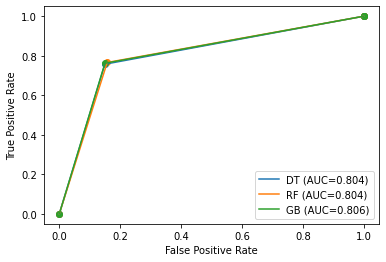

In [12]:
sup_name = ["DT","RF","GB"]
for i,r in enumerate(roc_sup_arr):
    axis = [list(t) for t in zip(*r)]
    plt.plot(axis[0],axis[1],label=sup_name[i]+" (AUC="+str("%.3f" %auroc_sup_arr[i])+")")
    plt.scatter(axis[0],axis[1])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('sup_roc.png')
plt.show()

In [13]:
roc_unsup_arr = np.asarray(roc_unsup_arr)
roc_unsup_arr = roc_unsup_arr[[0,1,2,3,5,6]]

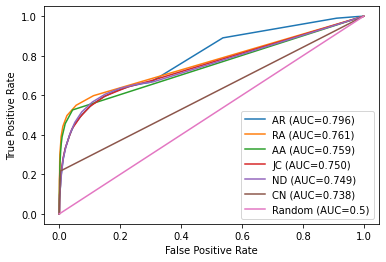

In [14]:
auroc_unsup_arr = auroc_unsup_arr[[0,1,2,3,5,6]]
# unsup_name = np.asarray(["CN","JC","AA","RA","PA","AR","ND","TN","UND","VND","SC"])
unsup_name = np.asarray(["CN","JC","AA","RA","AR","ND"])

sort_idx = np.argsort(auroc_unsup_arr)
auroc_unsup_arr =auroc_unsup_arr[sort_idx]
unsup_name = unsup_name[sort_idx]
roc_unsup_arr = roc_unsup_arr[sort_idx]



for i,r in reversed(list(enumerate(roc_unsup_arr))):
    axis = [list(t) for t in zip(*r)]
    plt.plot(axis[0],axis[1],label=unsup_name[i]+" (AUC="+str("%.3f" %auroc_unsup_arr[i])+")")
plt.plot([0.0,1.0],[0.0,1.0], alpha=1.0, label="Random (AUC=0.5)")
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('unsup_roc.png')
plt.show()

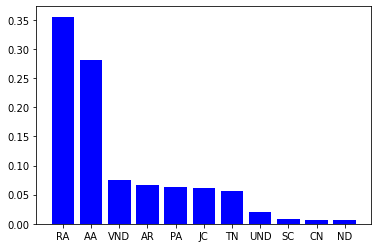

In [15]:
feature=np.array(["CN","JC","AA","RA","PA","AR","ND","TN","UND","VND","SC"])
feat_imp = np.array(feat_imp)
idx = np.flip(feat_imp.argsort())
x_pos = list(range(len(feat_imp)))
plt.bar(x_pos, feat_imp[idx], color='blue')
plt.xticks(x_pos, feature[idx])
plt.savefig('feature_imp.png')
plt.show()